<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Описание

## Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для модели будут использоваться данные с параметрами (концентрациями) веществ и материалов на различных этапах добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.  

Данные находятся в трёх файлах:

    gold_recovery_train_new.csv — обучающая выборка;
    gold_recovery_test_new.csv — тестовая выборка;
    gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В нашем распоряжении сырые данные: их просто выгрузили из хранилища.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы заказчик принял работу было принято использовать метрику sMAPE (Симметричный средний процент отклонения). Данная метрика более интуитивна для заказчика, т.к. результат отображается в процентах.

<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание-1">Возврат к содержанию</a></span></li></ul></div>

# Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

Выгрузим данные сразу перенеся дату в индекс.

In [2]:
train = pd.read_csv('D:/Подготовка DS Яндекс.Практикум/gold_recovery_train_new.csv', index_col='date')
test = pd.read_csv('D:/Подготовка DS Яндекс.Практикум/gold_recovery_test_new.csv', index_col='date')
data = pd.read_csv('D:/Подготовка DS Яндекс.Практикум/gold_recovery_full_new.csv', index_col='date')

In [3]:
display(train.head(), test.head(), data.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print(train.info(), test.info(), data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [5]:
pd.set_option('display.max_rows', None)
data.isna().sum() #пропуски на исходной выборке

final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 370
primary_cleaner.output.concentrate_au                   

In [6]:
train.isna().sum()

final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 286
primary_cleaner.output.concentrate_au                   

In [7]:
test.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

Итак, определено, что есть некоторые пропуски. Вероятно, их можно заменить либо средним значением по столбцу, либо средним двух соседних. Хотя в задаче и указано, что соседние по времени признаки часто близки по значению, для данного случая я больше склоняюсь чтобы заменить их средним по всему 

In [8]:
data['final.output.concentrate_sol'].mean()

9.50122419599556

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Затем найдем MAE между расчётами и значением признака.

In [9]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']
rougher_output_recovery = C * (F - T) * 100 / (F * (C - T))
mae = mean_absolute_error(rougher_output_recovery, train['rougher.output.recovery'])
mae

1.1131451184435918e-14

Такой низкий показатель среднего абсолютного отклонения говорит, что эффективность обогощаения рассчитана достаточно точно.

Теперь проанализируем признаки, недоступные в тестовой выборке.

In [10]:
missing_columns = set(train.columns) - set(test.columns) #недостающие в тесте столбцы
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Значит в тестовой выборке отсутствуют признаки связанные с параметрами продуктов и хвостов. Соответственно и целевые признаки также отсутствуют.

Можно приступать к предобработке данных. В первую очередь заменим пропуски.

In [11]:
def fill_zeros(df):
    for column in df.columns:
        df[column] = df[column].fillna(df[column].mean())

In [12]:
fill_zeros(train)
fill_zeros(test)
fill_zeros(data)

In [13]:
train.shape, test.shape 

((14149, 86), (5290, 52))

<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание-1">Возврат к содержанию</a></span></li></ul></div>

# Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Для этого необходимо построить гистограммы

In [14]:
def metall_conc(final, primary, rougher, base, name):
    plt.hist(final, bins=70, alpha=0.5, label='Final')
    plt.hist(primary, bins=70, alpha=0.5, label='Primary cleaner')
    plt.hist(rougher, bins=70, alpha=0.5, label='Rougher')
    plt.hist(base, bins=70, alpha=0.5, label='base')
    plt.title(name)
    plt.ylabel('Количество образцов')
    plt.xlabel('Концентрация вещества')
    plt.legend()
    plt.show()

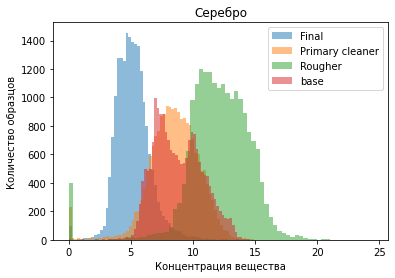

In [15]:
metall_conc(data['final.output.concentrate_ag'],
            data['primary_cleaner.output.concentrate_ag'], data['rougher.output.concentrate_ag'],
            data['rougher.input.feed_ag'], 'Серебро')

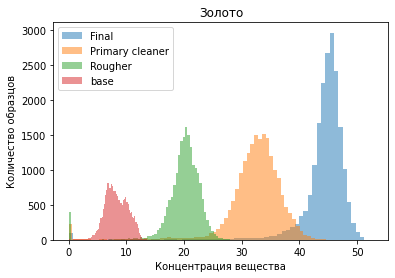

In [16]:
metall_conc(data['final.output.concentrate_au'],
            data['primary_cleaner.output.concentrate_au'], data['rougher.output.concentrate_au'],
            data['rougher.input.feed_au'], 'Золото')

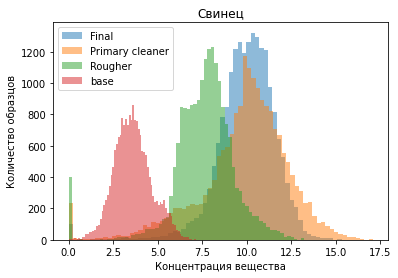

In [17]:
metall_conc(data['final.output.concentrate_pb'],
            data['primary_cleaner.output.concentrate_pb'], data['rougher.output.concentrate_pb'],
            data['rougher.input.feed_pb'], 'Свинец')

Только у Золота заметное количество образцов с большим его содержанием. В случае с серебром наблюдается уменьшение количества образцов с высоким содержанием серебра, когда как концентрация свинца растет вместе с концентрацие золота (что не удивительно, т.к. добывается золото, а свинец это побочный продукт химических реакций). Тем не менее такое наблюдение позволяет новорить что в финальных образцах содержание золота заметно больше чем было до обработки.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения будут сильно отличаются друг от друга, оценка модели будет неправильной.

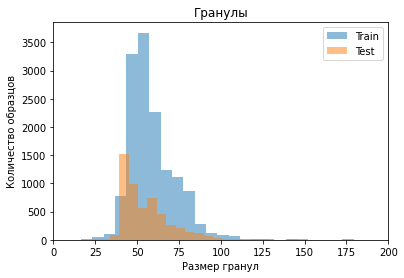

In [18]:
plt.hist(train['rougher.input.feed_size'], bins=70, alpha=0.5, label='Train')
plt.hist(test['rougher.input.feed_size'], bins=70, alpha=0.5, label='Test')
plt.title('Гранулы')
plt.ylabel('Количество образцов')
plt.xlabel('Размер гранул')
plt.xlim(0, 200)
plt.legend()
plt.show()

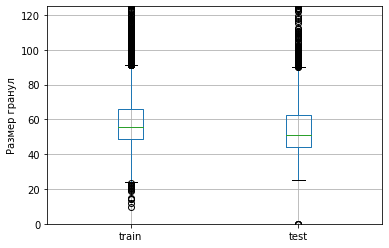

In [19]:
feed_size = pd.DataFrame({'train':train['rougher.input.feed_size'], 'test':test['rougher.input.feed_size']})
feed_size.boxplot()

plt.ylim(0, 125)
plt.ylabel('Размер гранул')
plt.show()

Можно заметить, что распределение для тестовой выборки немного отличается от такового для обучающей - первое сдвинуто немного в меньшую сторону. НО в целом размеры большинства частиц лежат в оптимальном интервале  40—100 мкм. Можно продолжать анализировать дальше.

Теперь исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [20]:
raw = data['rougher.input.feed_ag'] + data['rougher.input.feed_au'] + data['rougher.input.feed_pb'] + data['rougher.input.feed_sol']
rougher = data['rougher.output.concentrate_ag'] + data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_sol']
final = data['final.output.concentrate_ag'] + data['final.output.concentrate_au'] + data['final.output.concentrate_pb'] + data['final.output.concentrate_sol']

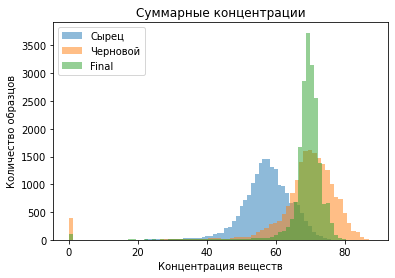

In [24]:
plt.hist(raw, bins=70, alpha=0.5, label='Сырец')
plt.hist(rougher, bins=70, alpha=0.5, label='Черновой')
plt.hist(final, bins=70, alpha=0.5, label='Final')
plt.title('Суммарные концентрации')
plt.ylabel('Количество образцов')
plt.xlabel('Концентрация веществ')
plt.legend()
plt.show()

Почему то в районе нуля есть подозрительное количество суммарных концентраций веществ.

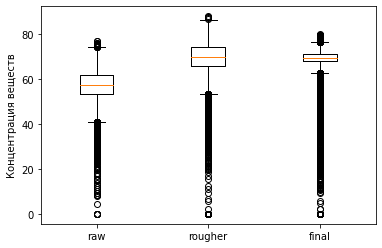

In [23]:
columns = [raw, rougher, final]
fih, ax = plt.subplots()
ax.boxplot(columns, labels=['raw', 'rougher', 'final'])

plt.ylabel('Концентрация веществ')
plt.show()

Такое наблюдение навело меня на мысль, что в первую очередь стоит удалить строки с суммарной концентрацией веществ равной нулю. Отсутствие концентрации веществ в сырье, черновом и финальном концентратах нас не интересует. Это говорит либо о пустом образце, либо об ошибке при снятии показаний. Ни то ни другое нам не нужно. Удалим строки в которых сумма концентраций равна нулю.

In [25]:
data['raw.concentrate'] = raw
data['rougher.concentrate'] = rougher
data['final.concentrate'] = final

In [26]:
train = train[(data['raw.concentrate']>0) & (data['rougher.concentrate']>0) & (data['final.concentrate']>0)]
test = test[(data['raw.concentrate']>0) & (data['rougher.concentrate']>0) & (data['final.concentrate']>0)]

<ipython-input-26-24fad3b8a29b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train = train[(data['raw.concentrate']>0) & (data['rougher.concentrate']>0) & (data['final.concentrate']>0)]
<ipython-input-26-24fad3b8a29b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = test[(data['raw.concentrate']>0) & (data['rougher.concentrate']>0) & (data['final.concentrate']>0)]


<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание-1">Возврат к содержанию</a></span></li></ul></div>

# Модель

Для начала подготовим функцию расчета метрики качества sMAPE.

In [27]:
def smape(rougher_target, rougher_pred, final_target, final_pred):
    rougher_smape = 100/len(rougher_target) * np.sum(2 * np.abs(rougher_target - rougher_pred) /
                                               (np.abs(rougher_target) + np.abs(rougher_pred)))
    final_smape = 100/len(final_target) * np.sum(2 * np.abs(final_target - final_pred) /
                                               (np.abs(final_target) + np.abs(final_pred)))
    return rougher_smape * .25 + final_smape * .75

Займемся теперь подбором моделей. Сначала определимся с моделью и её параметрами. Но сначала определим признаки.

In [28]:
features_roug_col = ['rougher.input.feed_ag',
                     'rougher.input.feed_pb',
                     'rougher.input.feed_rate',
                     'rougher.input.feed_size',
                     'rougher.input.feed_sol',
                     'rougher.input.feed_au',
                     'rougher.input.floatbank10_sulfate',
                     'rougher.input.floatbank10_xanthate',
                     'rougher.input.floatbank11_sulfate',
                     'rougher.input.floatbank11_xanthate',
                     'rougher.state.floatbank10_a_air',
                     'rougher.state.floatbank10_a_level',
                     'rougher.state.floatbank10_b_air',
                     'rougher.state.floatbank10_b_level',
                     'rougher.state.floatbank10_c_air',
                     'rougher.state.floatbank10_c_level',
                     'rougher.state.floatbank10_d_air',
                     'rougher.state.floatbank10_d_level',
                     'rougher.state.floatbank10_e_air',
                     'rougher.state.floatbank10_e_level',
                     'rougher.state.floatbank10_f_air',
                     'rougher.state.floatbank10_f_level'
                    ]

In [29]:
features_roug_train = train[features_roug_col]
target_roug_train = train['rougher.output.recovery']

In [30]:
features_final_train = train[test.columns]
target_final_train = train['final.output.recovery']

In [31]:
features_roug_test = test[features_roug_col]
target_roug_test = data.loc[test.index, 'rougher.output.recovery']
print(target_roug_test.shape, features_roug_test.shape)

(5154,) (5154, 22)


In [32]:
# признаками тестовой выборки является сама тестовая выборка
target_final_test = data.loc[test.index, 'final.output.recovery']
target_final_test.shape

(5154,)

Первым будет дерево решений. Гиперпараметры будем подбирать для финальной стадии.

In [33]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,10, 2)}

In [34]:
model = RandomForestRegressor(random_state=12345)

In [35]:
grid = GridSearchCV(model, parametrs, cv=5, n_jobs=-1)
grid.fit(features_final_train, target_final_train)
grid.best_params_

{'max_depth': 7, 'n_estimators': 20}

На основе подобранных гиперпараметров {'max_depth': 7, 'n_estimators': 20} проверим нашу метрику sMAPE.

In [36]:
model = RandomForestRegressor(max_depth=7, n_estimators=20, random_state=12345)
model.fit(features_roug_train, target_roug_train)
predict_roug_test = model.predict(features_roug_test)

In [37]:
model.fit(features_final_train, target_final_train)
predict_final_test = model.predict(test)

In [38]:
smape(target_roug_test, predict_roug_test, target_final_test, predict_final_test)

7.279940042434821

Проверим дерево решений.

In [39]:
parametrs = { 'max_depth': range (1,10, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [40]:
model = DecisionTreeRegressor(random_state=12345)

In [41]:
grid = GridSearchCV(model, parametrs, cv=5, n_jobs=-1)
grid.fit(features_final_train, target_final_train)
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

GridSearch определил {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [42]:
model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=2, random_state=12345)
model.fit(features_roug_train, target_roug_train)
predict_roug_test = model.predict(features_roug_test)

In [43]:
model.fit(features_final_train, target_final_train)
predict_final_test = model.predict(test)

In [44]:
smape(target_roug_test, predict_roug_test, target_final_test, predict_final_test)

7.574941674770464

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ОК

И для линейной регрессии.

In [45]:
model = LinearRegression()
model.fit(features_roug_train, target_roug_train)
predict_roug_test = model.predict(features_roug_test)

In [46]:
model.fit(features_final_train, target_final_train)
predict_final_test = model.predict(test)

In [47]:
smape(target_roug_test, predict_roug_test, target_final_test, predict_final_test)

7.491096086124761

Таким образом на основании метрики sMAPE лучшей моделью (7.28) будет случайный лес с количеством деревьев равным 20 и максимальной глубиной 7.

Осталось проверить выбранную модель на адекватность с помощью Дамми Регрессора.

In [48]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_roug_train, target_roug_train)
predict_roug_test = dummy_regr.predict(features_roug_test)

In [49]:
dummy_regr.fit(features_final_train, target_final_train)
predict_final_test = dummy_regr.predict(test)

In [50]:
smape(target_roug_test, predict_roug_test, target_final_test, predict_final_test)

7.766604067388528

| Модель    | Значение метрики
:-------- |:-----:
RandomForestRegressor  | 7.28  
DecisionTreeRegressor      | 7.57    
LinearRegression      | 7.49     
DummyRegressor      | 7.76     

Чтоже, показатель метрики на Дамми оказался выше (7.76). Можно перейти к выводы по проведенной работе.  

<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание-1">Возврат к содержанию</a></span></li></ul></div>

# Вывод

| Модель    | Значение метрики
:-------- |:-----:
RandomForestRegressor  | 7.28  
DecisionTreeRegressor      | 7.57    
LinearRegression      | 7.49     
DummyRegressor      | 7.76     

Итоговые метрики представлен в таблице выше. Случайчный лес показал лучшую метрику равную 7.28%. В дальнейшем необходимо представить полученные данные заказчику на оценку достаточности достигнутого результата.

При необходимости улучшения модели вижу следующие возможные решения:
- подбор других моделей и гиперпараметров;  
- генерация новых признаков;  
- запрос у заказчика дополнительных параметров при проведении очистки. Например, температура, использование веществ и пр.  
- углубление в понимание самого физического процесса очистки руды. Вероятно, на основе новых знаний возможно создание принципиально другого решения.

<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание" data-toc-modified-id="Содержание-1">Возврат к содержанию</a></span></li></ul></div>